###### Uppgift 2 - ML modell
###### Gå igenom data science workflow, med att testa olika modeller och evaluera.
######  Välj därefter en modell och träna på all data. Dvs.  Ta fram en ML modell för att prediktera taxipriser
###### Exportera därefter datan med hjälp av joblib


In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("taxi_cleaned_training_data.csv")
df.head()

,Trip_Distance_km,Trip_Duration_Minutes,Time_of_Day,Passenger_Count,Trip_Price
0,19.35,53.82,Morning,3.0,36.2624
1,36.87,37.27,Evening,1.0,52.9032
2,25.87,22.64,Evening,3.0,15.6180
3,8.64,89.33,Afternoon,2.0,60.2028
4,43.44,61.57,Evening,3.0,101.1216


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       716 non-null    float64
 1   Trip_Duration_Minutes  716 non-null    float64
 2   Time_of_Day            716 non-null    object 
 3   Passenger_Count        716 non-null    float64
 4   Trip_Price             716 non-null    float64
dtypes: float64(4), object(1)
memory usage: 28.1+ KB


# Linear Regression model with Scikit learn steps


0. Divide into X & y
- X = What model knows
- y= The predicition of the model

In [5]:
X, y = df.drop(columns="Trip_Price", axis=1), df["Trip_Price"]
X.head(5)

,Trip_Distance_km,Trip_Duration_Minutes,Time_of_Day,Passenger_Count
0,19.35,53.82,Morning,3.0
1,36.87,37.27,Evening,1.0
2,25.87,22.64,Evening,3.0
3,8.64,89.33,Afternoon,2.0
4,43.44,61.57,Evening,3.0


In [6]:
y.head(5)

0     36.2624
1     52.9032
2     15.6180
3     60.2028
4    101.1216
Name: Trip_Price, dtype: float64

1. Train| test split


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

### Dummy Encoding
-Categorical feature: Time_of_Day is string want to represent binary

In [8]:
X_train = pd.get_dummies(X_train, drop_first=True).astype(int)
X_test = pd.get_dummies(X_test, drop_first=True).astype(int)

X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

2. Scale dataset

In [9]:
from sklearn.preprocessing import MinMaxScaler

# instantiate a MinMaxScaler instance
scaler = MinMaxScaler()

# important note: fit on X-train and not X_test -> this avoids data leakage
scaler.fit(X_train) # use training data to fit the scaler

# transforms or scales X_train and X_test
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((479, 6), (237, 6))

In [10]:
scaled_X_train.min(), scaled_X_train.max()

(np.float64(0.0), np.float64(1.0))

In [11]:
# we have used parameters X_min abd X_max from X_train to scale X_test
# if you get exactly 0 and 1 here then probably you have fit X_test which would leak data
scaled_X_test.min(), scaled_X_test.max()

(np.float64(0.0), np.float64(1.0))

# Check algorithms

In [12]:
from sklearn.linear_model import LinearRegression

# this model uses SVD approach for solving normal equation
model = LinearRegression()
model.fit(scaled_X_train, y_train)
print(f"Parameters: {model.coef_}")
print(f"Intercept parameter: {model.intercept_}")

Parameters: [53.96784937 30.63453274  0.68384089  2.3346632   1.68990594  2.64124555]
Intercept parameter: 8.514092891064053


3. Predict on test data

In [13]:
y_pred = model.predict(scaled_X_test)
y_pred

array([59.94124291, 59.5649637 , 37.5901356 , 71.12887959, 79.75150908,
       50.93791473, 57.09725957, 45.95905719, 65.47713699, 46.71177358,
       15.02791859, 52.40220155, 52.5439291 , 24.60753243, 56.17699607,
       45.45170087, 54.9969021 , 42.74557128, 50.53178419, 44.75658381,
       17.33475938, 37.71713202, 82.39373397, 60.50225176, 65.54787781,
       77.26108111, 50.58945794, 34.97388262, 86.01600734, 65.24674409,
       80.16638009, 55.12988357, 93.5700704 , 50.53590391, 51.03899309,
       26.86463914, 36.3991843 , 75.96591108, 55.99423588, 39.83683216,
       63.16136367, 67.63522205, 49.64829608, 38.06292627, 30.19909177,
       19.14508636, 45.85303212, 66.66356042, 35.83164473, 25.74688433,
       53.06203436, 20.0714334 , 83.37167121, 88.86878143, 47.02093986,
       51.98738439, 58.87700309, 46.00613435, 63.45728995, 46.38483018,
       55.09331507, 45.44301426, 48.42465009, 59.56520962, 57.36794736,
       68.01582786, 51.74973653, 79.61606633, 88.81498148, 64.72

4. Evalutation

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_lin_reg = mean_absolute_error(y_test, y_pred)
mse_lin_reg = mean_squared_error(y_test, y_pred)
rmse_lin_reg = np.sqrt(mse_lin_reg)

mae_lin_reg, mse_lin_reg, rmse_lin_reg

(11.6323864190687, 207.8726929844314, np.float64(14.417790849656248))

# Random forest model with Scikit learn steps


### 1. train|test split 

- Done above

### 2. SKIP the scaling

- tree based algorithms should not scale in general 
- Random forest is based on decision trees and decision trees divides features using threshold 
- but its ok if one has done it

### 3. Training 

In [15]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

### 4. Predict on test data

In [16]:
y_pred = clf.predict(X_test)
y_pred

array([67.659704, 60.742835, 34.729171, 73.75958 , 81.13054 , 56.649561,
       66.793211, 46.491611, 74.005814, 43.717505, 12.660251, 61.634174,
       54.430276, 19.152962, 61.600368, 43.399143, 48.834994, 52.929617,
       47.575591, 44.12051 , 14.764782, 29.028083, 78.388344, 68.573026,
       62.130615, 62.032586, 51.240261, 37.697647, 83.557019, 67.984681,
       79.506678, 50.665321, 83.718051, 59.340245, 52.773348, 32.617674,
       26.693891, 82.000062, 61.88241 , 49.901132, 65.878104, 70.181312,
       51.448415, 44.037461, 26.418521, 19.340927, 48.895358, 69.729838,
       36.775492, 20.711065, 57.103809, 15.773601, 81.110954, 69.059021,
       40.011585, 47.91854 , 49.593902, 43.639217, 61.503894, 42.10306 ,
       60.711537, 46.905566, 54.349466, 59.918157, 59.585068, 82.393592,
       51.330373, 80.302377, 89.988764, 68.737845, 26.251992, 64.374742,
       51.400517, 55.254494, 71.745102, 45.734542, 57.46684 , 46.908172,
       64.863477, 45.057148, 82.895772, 47.258002, 

In [17]:
y_test.values

array([ 51.9016,  55.8212,  32.342 ,  78.188 ,  67.2451,  57.1264,
        55.3948,  41.4372,  37.3559,  48.1275,   9.9494,  30.942 ,
        59.2055,  19.9744,  87.2987,  52.6406,  73.5818,  45.7545,
        51.8548,  31.306 ,  18.8626,  26.9202,  81.572 ,  43.3123,
        77.5496,  66.5363,  74.5998,  29.645 ,  82.0828,  57.153 ,
        79.833 ,  66.566 ,  88.6814,  56.2678,  30.446 ,  25.5304,
        31.99  ,  58.2448,  76.1018,  52.7796,  63.5224,  95.9602,
        62.6572,  31.4168,  21.7323,  11.3358,  46.4647,  46.2078,
        16.1211,  13.3746,  52.5934,  17.1476,  68.5285,  97.4848,
        46.0189,  33.3599,  57.9476,  29.0925,  67.736 ,  44.4294,
        44.7782,  52.2336,  36.0271,  47.33  ,  70.2411,  81.9816,
        72.2196, 102.7246,  87.7201,  52.9218,  17.6621,  64.7223,
        58.5929,  88.9502,  67.2293,  31.8132,  50.5038,  51.0588,
        84.873 ,  65.232 ,  65.9479,  47.8069,  44.844 ,  40.2799,
        19.9427,  51.1318,  46.1526,  23.1248,  40.174 ,  45.3

### 5. Evaluate

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_rand_forest = mean_absolute_error(y_test, y_pred)
mse_rand_forest = mean_squared_error(y_test, y_pred)
rmse_rand_forest = np.sqrt(mse_rand_forest)

mae_rand_forest, mse_rand_forest, rmse_rand_forest

(12.667551691983116, 267.9815313817471, np.float64(16.370141458819074))

# KNN model with Scikit learn steps

### 1. train|test split

- Done


### 2. scale dataset

- KNN very important to scale

### 3. KNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# for simplicity we'll go for default
model = KNeighborsRegressor(n_neighbors=5)
model.fit(scaled_X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### 4. Predict on test data 

In [20]:
y_pred = model.predict(scaled_X_test)
y_pred

array([56.435  , 58.64098, 34.5033 , 67.6896 , 71.8413 , 54.22388,
       66.32172, 52.1528 , 66.66178, 39.93566, 37.3178 , 49.9351 ,
       45.23408, 28.14426, 54.61532, 44.2247 , 59.11148, 45.77114,
       55.31   , 50.77784, 14.63664, 31.5897 , 86.79722, 70.79268,
       77.91016, 58.0659 , 49.0901 , 35.89252, 79.49428, 70.79268,
       89.69216, 58.82124, 81.52704, 45.73952, 45.0008 , 29.9291 ,
       33.30046, 78.84588, 56.06622, 42.81246, 74.68194, 59.44254,
       52.74722, 36.2474 , 34.2328 , 27.46422, 53.9019 , 66.56374,
       35.21544, 21.23202, 54.931  , 17.09922, 70.4948 , 64.82988,
       54.97988, 53.85634, 52.27448, 45.54874, 53.13968, 46.2171 ,
       43.27806, 36.7483 , 50.58922, 67.88764, 55.82308, 77.91016,
       66.31744, 81.15792, 83.28076, 76.64952, 30.27538, 80.18404,
       41.46192, 77.67944, 78.91494, 42.84876, 62.86062, 37.38548,
       41.57368, 66.32172, 62.86062, 56.96634, 51.82952, 68.8    ,
       26.56706, 68.82988, 70.79268, 28.65298, 65.51768, 48.98

In [21]:
y_test.values

array([ 51.9016,  55.8212,  32.342 ,  78.188 ,  67.2451,  57.1264,
        55.3948,  41.4372,  37.3559,  48.1275,   9.9494,  30.942 ,
        59.2055,  19.9744,  87.2987,  52.6406,  73.5818,  45.7545,
        51.8548,  31.306 ,  18.8626,  26.9202,  81.572 ,  43.3123,
        77.5496,  66.5363,  74.5998,  29.645 ,  82.0828,  57.153 ,
        79.833 ,  66.566 ,  88.6814,  56.2678,  30.446 ,  25.5304,
        31.99  ,  58.2448,  76.1018,  52.7796,  63.5224,  95.9602,
        62.6572,  31.4168,  21.7323,  11.3358,  46.4647,  46.2078,
        16.1211,  13.3746,  52.5934,  17.1476,  68.5285,  97.4848,
        46.0189,  33.3599,  57.9476,  29.0925,  67.736 ,  44.4294,
        44.7782,  52.2336,  36.0271,  47.33  ,  70.2411,  81.9816,
        72.2196, 102.7246,  87.7201,  52.9218,  17.6621,  64.7223,
        58.5929,  88.9502,  67.2293,  31.8132,  50.5038,  51.0588,
        84.873 ,  65.232 ,  65.9479,  47.8069,  44.844 ,  40.2799,
        19.9427,  51.1318,  46.1526,  23.1248,  40.174 ,  45.3

### 5. Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_knn = mean_absolute_error(y_test, y_pred)
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)

mae_knn, mse_knn, rmse_knn

(13.314788860759494, 271.83999304781435, np.float64(16.487570865588854))

## Theory Conclussion: Which models to choose compare RMSE 


- RMSE has same unit as y
- Trip duration in min ->RMSE in min
- Passenger count -> RMSE in passener
- RMSE = primary metric - big errors
- MAE = secondary  - typical errors
- MSE = math optimization

In [23]:
model ={}

model["Linear Regression"] = {
     "MAE": mae_lin_reg,
    "RMSE": rmse_lin_reg
}


model["Random Forest"] = {
    "MAE": mae_rand_forest,
    "RMSE": rmse_rand_forest
}

model["KNN"] = {
    "MAE":mae_knn, 
    "RMSE": rmse_knn
}

model





{'Linear Regression': {'MAE': 11.6323864190687,
  'RMSE': np.float64(14.417790849656248)},
 'Random Forest': {'MAE': 12.667551691983116,
  'RMSE': np.float64(16.370141458819074)},
 'KNN': {'MAE': 13.314788860759494, 'RMSE': np.float64(16.487570865588854)}}

### Conclussion : According to statics better choose Linear Regression after looking at the variable RMSE is  lowest their

<function matplotlib.pyplot.show(close=None, block=None)>

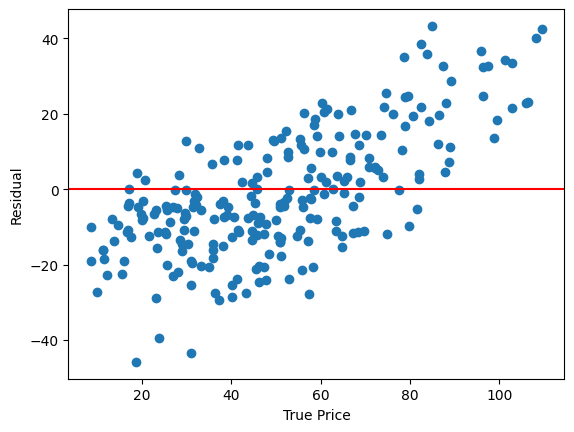

In [24]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred 

plt.scatter(y_test, residuals)
plt.axhline(0, color="red")
plt.xlabel("True Price")
plt.ylabel("Residual")
plt.show

# Training up choosen Model = LR for production

In [33]:
choosen_model = LinearRegression()
choosen_model.fit(X_train, y_train)

X_features = pd.get_dummies(X,drop_first=True)

### Joblib = save and load trained models efficently

- used by sklearn proj
- persist models like LinearRegression, RandomForest, KNN
- created 2 different joblib 

In [34]:
import joblib

joblib.dump({"model": choosen_model, "scaler": scaler, "features": X_features.columns.tolist()}, "LM_model.joblib", compress=("xz", 3), protocol=5)



['LM_model.joblib']